# Prevendo os sobreviventes do Titanic
# Modelo 1

In [80]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

## Visualização e Análise descritiva dos dados

In [81]:
treino = pd.read_csv(r'C:\Users\Lenovo\Documents\MeusProjetos\Data-Science\Titanic\train.csv')
teste = pd.read_csv(r'C:\Users\Lenovo\Documents\MeusProjetos\Data-Science\Titanic\test.csv')

treino.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [82]:
treino.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [83]:
treino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Preparando o modelo com as colunas Pclass, Sex, Age, SibSp e Parch

In [91]:
variaveis_treino = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Survived']
variaveis_teste = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch']

In [93]:
treino1 = treino[variaveis_treino].copy()
treino1['Sex_numerico'] = treino1['Sex'].apply(lambda x: 1 if x == 'female' else 0)
teste1 = teste[variaveis_teste].copy()
teste1['Sex_numerico'] = teste1['Sex'].apply(lambda x: 1 if x == 'female' else 0)

In [94]:
print(treino1.isnull().sum())

Pclass            0
Sex               0
Age             177
SibSp             0
Parch             0
Survived          0
Sex_numerico      0
dtype: int64


In [95]:
def preenche_nan(df, valor):
    df = df.fillna(valor)

    return df

treino1 = preenche_nan(treino1, -1)
teste1 = preenche_nan(teste1, -1)
treino1

,Pclass,Sex,Age,SibSp,Parch,Survived,Sex_numerico
0,3,male,22.0,1,0,0,0
1,1,female,38.0,1,0,1,1
2,3,female,26.0,0,0,1,1
3,1,female,35.0,1,0,1,1
4,3,male,35.0,0,0,0,0
...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,0,0
887,1,female,19.0,0,0,1,1
888,3,female,-1.0,1,2,0,1
889,1,male,26.0,0,0,1,0


In [96]:
print(treino1.isnull().sum())

Pclass          0
Sex             0
Age             0
SibSp           0
Parch           0
Survived        0
Sex_numerico    0
dtype: int64


## Criando o modelo com vizinhos = 3

In [97]:
knn = KNeighborsClassifier(n_neighbors=3)

In [101]:
X_treino = treino1.drop(columns=['Sex', 'Survived'])
y_treino = treino1['Survived']

X_teste = teste1.drop(columns=['Sex'])

In [102]:
X_teste.head()

,Pclass,Age,SibSp,Parch,Sex_numerico
0,3,34.5,0,0,0
1,3,47.0,1,0,1
2,2,62.0,0,0,0
3,3,27.0,0,0,0
4,3,22.0,1,1,1


In [103]:
knn.fit(X_treino, y_treino)

y_pred = knn.predict(X_teste)
y_pred

array([0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,

## Arquivo de submissão

In [105]:
sub = pd.Series(y_pred, index=teste['PassengerId'], name='Survived')
sub.shape

(418,)

In [106]:
sub.to_csv('Primeiro_modelo.csv', header=True)

# Modelo 2

In [110]:
from sklearn.tree import DecisionTreeClassifier  
from sklearn.model_selection import train_test_split 


## Verificando a melhor profundidade

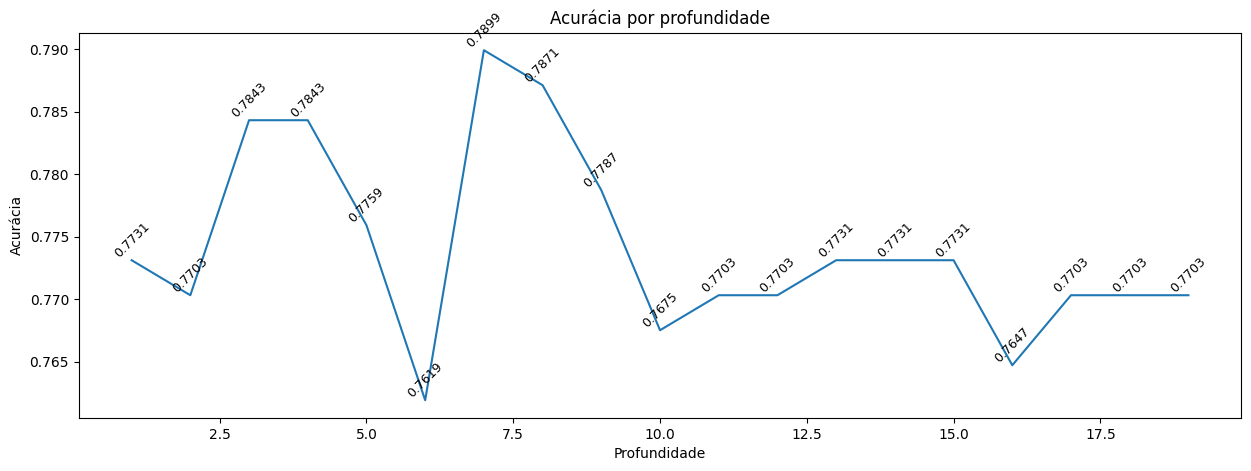

In [113]:
X_treino, X_valid, y_treino, y_valid = train_test_split(treino1.drop(columns=['Sex', 'Survived']), 
                                                        treino1['Survived'], 
                                                        test_size=0.4, 
                                                        random_state=42)


lista_acuracia = []

for depth in range(1, 20):
    modelo2 = DecisionTreeClassifier(random_state=42, max_depth=depth)
    modelo2.fit(X_treino, y_treino)
    pred = modelo2.predict(X_valid)
    accur = accuracy_score(pred, y_valid)
    lista_acuracia.append(accur)


plt.figure(figsize=(15,5))
plt.plot(range(1, len(lista_acuracia) + 1), lista_acuracia)
plt.xlabel('Profundidade')
plt.ylabel('Acurácia')
plt.title('Acurácia por profundidade')

# Adicionando os valores de acurácia em cada ponto
for i, acc in enumerate(lista_acuracia, start=1):
    plt.text(i, acc, f'{acc:.4f}', fontsize=9, ha='center', va='bottom', rotation=45)
plt.show()    #profundidade 7 apresentou maior valor

## Verificando o melhor número de folhas

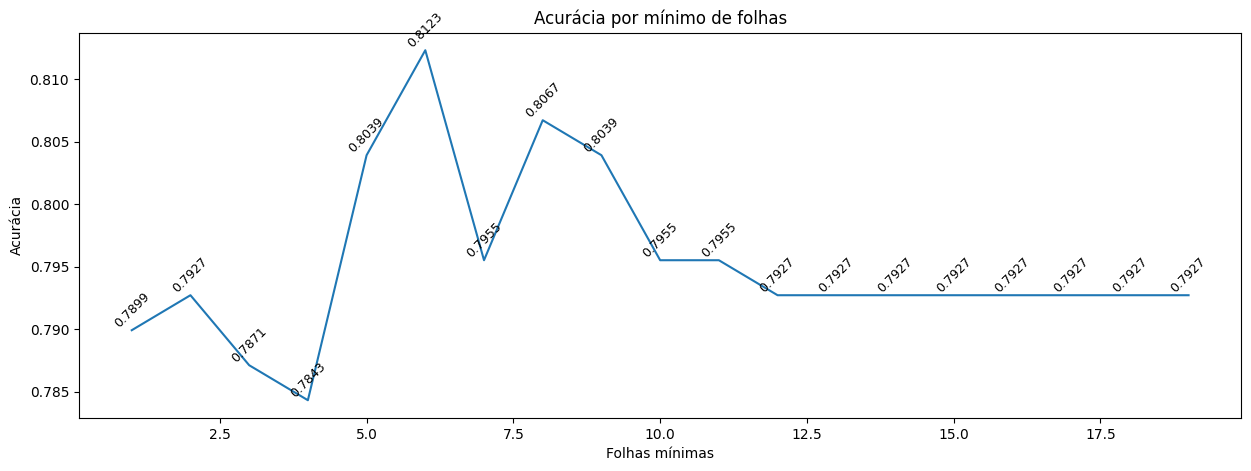

In [114]:
lista_acuracia = []

for leaf in range(1, 20):
    modelo2 = DecisionTreeClassifier(random_state=42, min_samples_leaf=leaf, max_depth=7)
    modelo2.fit(X_treino, y_treino)
    pred = modelo2.predict(X_valid)
    accur = accuracy_score(pred, y_valid)
    lista_acuracia.append(accur)


plt.figure(figsize=(15,5))
plt.plot(range(1, len(lista_acuracia) + 1), lista_acuracia)
plt.xlabel('Folhas mínimas')
plt.ylabel('Acurácia')
plt.title('Acurácia por mínimo de folhas')

# Adicionando os valores de acurácia em cada ponto
for i, acc in enumerate(lista_acuracia, start=1):
    plt.text(i, acc, f'{acc:.4f}', fontsize=9, ha='center', va='bottom', rotation=45)
plt.show()   #minimo de 6 folhas foi melhor

In [115]:
X_treino = treino1.drop(columns=['Sex', 'Survived'])
y_treino = treino1['Survived']

X_teste = teste1.drop(columns=['Sex'])

modelo2 = DecisionTreeClassifier(max_depth=7, min_samples_leaf=6, random_state=42)
modelo2.fit(X_treino, y_treino)
y_pred2 = modelo2.predict(X_teste)
y_pred2


array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

## Segundo arquivo de submissão

In [116]:
sub = pd.Series(y_pred2, index=teste['PassengerId'], name='Survived')
sub.shape

(418,)

In [117]:
sub.to_csv('Segundo_modelo.csv', header=True)